#### CSCE 670 :: Information Storage and Retrieval :: Texas A&M University :: Spring 2018


# Homework 1:  Basic Machine Learning + Learning to Rank 

### 100 points [5% of your final grade]

### Due: Monday, February 12 by 11:59pm

*Goals of this homework:* In this homework you will get hands-on experience with (i) the basics of machine learning (e.g. train/test data, cross-validation, different classifiers) and interpreting results; and (ii) learning to rank.

*Submission Instructions:* To submit your homework, rename this notebook as UIN_hw#.ipynb. For example, this homework submission would be: YourUIN_hw1.ipynb. Submit this notebook via ecampus. Your notebook should be completely self-contained, with the results visible in the notebook. 

*Late submission policy:* For this homework, you may use up to three of your late days, meaning that no submissions will be accepted after Thursday, February 15 at 11:59pm.

*Collaboration policy:* You are expected to complete each homework independently. Your solution should be written by you without the direct aid or help of anyone else. However, we believe that collaboration and team work are important for facilitating learning, so we encourage you to discuss problems and general problem approaches (but not actual solutions) with your classmates. You may post on Piazza, search StackOverflow, etc. But if you do get help in this way, you must inform us by **filling out the Collaboration Declarations at the bottom of this notebook**. 

*Example: I found helpful code on stackoverflow at https://stackoverflow.com/questions/11764539/writing-fizzbuzz that helped me solve Problem 2.*

The basic rule is that no student should explicitly share a solution with another student (and thereby circumvent the basic learning process), but it is okay to share general approaches, directions, and so on. If you feel like you have an issue that needs clarification, feel free to contact either me or the TA.

# Part 1: Basics of ML (70 points)

For this part, we're going to get familiar with scikit-learn (a great ML toolkit that is very popular) and the major issues in training a model, testing it, and interpreting the results. Our goal in this assignment is to build a classifier to determine if a Yelp review is "food-relevant" or not.

## Dataset: Yelp review data

First, you will need to download the training_data.json file from the Resources tab on Piazza, a collection of 40,000 json-encoded Yelp reviews we sampled from the [Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge).

You'll see that each line corresponds to a review on a particular business. The label (class) information of each review is in the "label" field. It is **either "Food-relevant" or "Food-irrelevant"**.

## Part 1.1: Parsing Yelp (15 points)

For this first part, we will build a parser for extracting tokens from the **review text** only. First, you should tokenize each review using **whitespaces and punctuations as delimiters**. Do not remove stopwords. You should apply casefolding (lower case everything) and use the [nltk Porter stemmer](http://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) ... you may need to install nltk if you don't have it already. 

In [1]:
# your code here
# use as many cells as you need

import pandas as pd
import numpy as np
import string
import re
import nltk
import math
import matplotlib.pyplot as plt  
ps = nltk.PorterStemmer()

json_reviews = pd.read_json("training_data.json", lines=True)


In [2]:
reviews = json_reviews['text']
reviews_tokenized = []
for i in reviews:
    reviews_tokenized += re.split('\W+', i)

reviews_tokenized = [ps.stem(x.lower()) for x in reviews_tokenized]
reviews_tokenized = filter(lambda x: len(x)>0, reviews_tokenized)

In [4]:
reviews_tokenized_bk = reviews_tokenized
len(reviews_tokenized_bk)

5155958

### Unique tokens?

Once you have your parser working, you should report here the size of your feature space. That is, how many unique tokens do you find?

In [5]:
# your code here
len(set(reviews_tokenized))

36555

### The Most Popular Words

Great, now we can tokenize the documents. Let's make a list of the most popular words in our reviews. For this step, you should maintain a count of how many times each word occurs. Then you should print out the top-20 words in your reviews.

Your output should look like this:

Rank Token Count

1 awesome 78

... ...

In [7]:
# your code here
y = reviews_tokenized
dict1 = {x:y.count(x) for x in set(y)}

In [8]:
# dict1 = dict(zip(reviews_tokenized, wordfreq))
count = 1
for w in sorted(dict1, key=dict1.get, reverse=True):
  if(count > 20):
        break
  print count,":",w,"-",dict1[w]
  count += 1

1 : the - 246309
2 : i - 168931
3 : and - 168589
4 : a - 134904
5 : to - 128139
6 : it - 78867
7 : of - 76237
8 : wa - 74020
9 : is - 63496
10 : for - 60867
11 : in - 60523
12 : that - 50804
13 : my - 50565
14 : you - 45881
15 : they - 43635
16 : thi - 39940
17 : with - 39340
18 : have - 39082
19 : but - 37967
20 : on - 35388


### Zipf's Law

Recall in class our discussion of Zipf's law. Let's see if this law applies to our Yelp reviews. You should use matplotlib to plot the log-base10 term counts on the y-axis versus the log-base10 rank on the x-axis. Your aim is to create a figure like the one in Figure 5.2 of the textbook.

In [9]:
# your code here
words = sorted(dict1, key=dict1.get, reverse=True)
counts = [dict1[x] for x in words]
rank = range(1,len(words)+1)
log_rank = [math.log10(x) for x in rank]
log_counts = [math.log10(x) for x in counts]

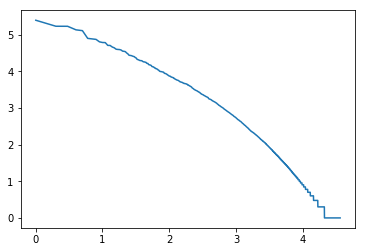

In [10]:
plt.plot(log_rank, log_counts)

What do you observe? Is this consistent with Zipf's law?

*Your answer goes here*

## Part 1.2: Feature Represenation (10 points)

In this part you will build feature vectors for each review. This will be input to our ML classifiers. You should call your parser from earlier, using all the same assumptions (e.g., casefolding, stemming). Each feature value should be the term count for that review.

In [3]:
# your code
revs2 = [ps.stem(unicode.lower(i)) for i in json_reviews.text]

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
tokenise = vectorizer.fit_transform(revs2)

## Part 1.3: Machine Learning Basics (30 points)

In this part you will evaluate a bunch of classifiers -- kNN, Decision tree, Naive Bayes, and SVM -- on the feature vectors generated in the previous task in two different settings. **You do not need to implement any classifier from scratch. You may use scikit-learn's built-in capabilities.**

### Setting 1: Splitting data into train-test 

In the first setting, you should treat the first 70% of your data as training. The remaining 30% should be for testing. 

### Setting 2: Using 5 fold cross-validation

In the second setting, use 5-folk cross-validation. 

### What to report

* Report the overall accuracy for both settings.
* For the class "Food-relevant", report the precision and recall for both settings.
* For the class "Food-irrelevant", report the precision and recall for both settings.

In [6]:
n = tokenise.shape[0]
n_tr = int(0.7*n) 

df_X = tokenise
df_Y = json_reviews.label

df_trn = tokenise[:n_tr,]
df_ts = tokenise[n_tr:,]
y_trn = json_reviews.label[:n_tr]
y_ts = json_reviews.label[n_tr:]

In [5]:
import sklearn as sk

knn = sk.neighbors.KNeighborsClassifier(n_neighbors = 1)
knn.fit(df_trn, y_trn)
pred_ts_knn = knn.predict(df_ts)

In [6]:
svc = sk.svm.SVC(kernel = 'linear')
svc.fit(df_trn, y_trn)
svm_pred = svc.predict(df_ts)

In [7]:
import sklearn.tree
dtc = sk.tree.DecisionTreeClassifier()
dtc.fit(df_trn, y_trn)
pred_ts_dtc = dtc.predict(df_ts)


In [15]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
gnb.fit(df_trn, y_trn)
pred_ts_gnb = gnb.predict(df_ts)

In [16]:
print "knn:", sk.metrics.accuracy_score(pred_ts_knn, y_ts)
print "svm:", sk.metrics.accuracy_score(svm_pred, y_ts)
print "tree:", sk.metrics.accuracy_score(pred_ts_dtc, y_ts)
print "mnb", sk.metrics.accuracy_score(pred_ts_gnb, y_ts)

knn: 0.37316666666666665
svm: 0.8554166666666667
tree: 0.7695833333333333
mnb 0.939


In [43]:
from sklearn.model_selection import cross_val_score
print " training KNN"
scores_knn = cross_val_score(knn, df_X, df_Y, cv=5)

print " training Naive Bayes"
scores_mnb = cross_val_score(gnb, df_X, df_Y, cv=5)

print " training a Decision Tree"
scores_dtc = cross_val_score(dtc, df_X, df_Y, cv=5)

print " training SVM"
scores_svc = cross_val_score(svc, df_X, df_Y, cv=5)

 training KNN
 training Naive Bayes
 training a Decision Tree
 training SVM


In [45]:
print "5 fold CV"

print "KNN"
print scores_knn
print scores_knn.mean()

print "Naive Bayes"
print scores_mnb
print scores_mnb.mean()

print "Tree"
print scores_dtc
print scores_dtc.mean()

print "SVM"
print scores_svc
print scores_svc.mean()

5 fold CV
KNN
[0.64475  0.67275  0.68     0.6565   0.673625]
0.6655249999999999
Naive Bayes
[0.90375 0.914   0.94775 0.956   0.95625]
0.9355500000000001
Tree
[0.842125 0.86675  0.8735   0.8645   0.878625]
0.8651
SVM
[0.891375 0.9055   0.925625 0.92025  0.9235  ]
0.91325


## Part 1.4: Analyzing your results (5 points) 

OK, now that you have tried four different classifiers, what do you observe? Any conclusions you can draw? Give us one or two paragraphs summarizing your findings.

*add your discussion here*


## Part 1.5: Improving your classifier (10 points)

I think we can do better! In this part, your job is to create new features that you can think can help improve your classifier. You may choose to use new weightings for your words, new derived features (e.g., count of 3-letter words), or whatever you like. You may also add in the extra features in the json: funny, useful, cool. You will need to experiment with different approaches ... once you finalize on your best approach, include the features here with a description (that is, tell us what the feature means). Then give us your classifier results!

In [37]:
# your code here ... add as many cells as you need for features, results, and discussion.
json_reviews["is_useful"] = [i["useful"]  for i in json_reviews.votes]
json_reviews["is_cool"] = [i["cool"]  for i in json_reviews.votes]
json_reviews["is_funny"] = [i["funny"]  for i in json_reviews.votes]
json_reviews["chr_length"] = [len(i) for i in json_reviews.text]
json_reviews["word_length"] = [len(i.split()) for i in json_reviews.text]


cols = ["is_useful", "word_length", "is_cool", "is_funny"]

df_X_new = json_reviews[cols]
df_Y = json_reviews.label


scores_new = cross_val_score(gnb, df_X_new, df_Y, cv=5)
print scores_new.mean()

0.5212


In [42]:
from sklearn.pipeline import FeatureUnion
revs2

[u"dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank.",
 u"unfortunately, the frustration of being dr. goldberg's patient is a repeat of the experience i've had with so many other doctors in nyc -- good doctor, terrible staff.  it seems that his staff simply never answers the phone.  it usually takes 2 hours of repeated calling to get an answer.  who has time for that or wants to deal with it?  i have run into this problem with many other doctors and i just don't get it.  you have office workers, you have patie

### BONUS: What are the most informative features in distinguishing these two classes?

In [25]:
# Your code here
ppl = Pipeline([
              ('ngram', CountVectorizer(ngram_range=(1, 4), analyzer='char')),
              ('clf',   LinearSVC())
      ])

5

# Part 2: Learning to Rank (30 points)

For this part, we're going to play with some Microsoft LETOR data that has query-document relevance judgments. Let's see how learning to rank works in practice. 

First, you will need to download the MQ2008.zip file from the Resources tab on Piazza. This is data from the [Microsoft Research IR Group](https://www.microsoft.com/en-us/research/project/letor-learning-rank-information-retrieval/).

The data includes 15,211 rows. Each row is a query-document pair. The first column is a relevance label of this pair (0,1 or 2--> the higher value the more related), the second column is query id, the following columns are features, and the end of the row is comment about the pair, including id of the document. A query-document pair is represented by a 46-dimensional feature vector. Features are a numeric value describing a document and query such as TFIDF, BM25, Page Rank, .... You can find compelete description of features from [here](https://arxiv.org/ftp/arxiv/papers/1306/1306.2597.pdf).

The good news for you is the dataset is ready for analysis: It has already been split into 5 folds (see the five folders called Fold1, ..., Fold5).

For this assignment, we're going to leave our favorite scikit-learn and instead use [SVM-rank](https://www.cs.cornell.edu/people/tj/svm_light/svm_rank.html). This is the basic ranking SVM we talked about in class. You'll see that SVM-rank considers pairwise relevance between docs -- so based on the training data it will transform the data into pairs -- like D1 > D2 and then learn a separator.


## Part 2.1: Optimizing SVM-Rank (15 points)

First, you should explore how the different parameters affect the quality of the Ranking SVM. You'll see that you can vary the kernel function, the loss function and so forth. 

You should run SVM-Rank using the default options over each of the five folds. You should find the error on the test set (for example, depending on your settings, svm_rank_classify will give you the zero/one error statistics (that is, the number of correct pairs and the number of incorrect pairs). Report the average. 

Then try different parameters and report how they impact the quality of results. 

*add your results and discussion here*


## Part 2.1: Noise! (15 points)

Now we're going to investigate whether the ranking SVM is easily influenced by noisy features. For example, what if some of the features you have are in error? Or what if you downloaded only a portion of a page to calculate a feature? (so the count of inlinks would be wrong)? 

In this case, add some noise to the features. What happens to the results? You may choose to add random noise throughout, noise to a single feature, noise to multiple features, etc. The choices are up to you. We aim to see what kind of exploration you conduct and what you conclude.

*add your results and discussion here*

## Collaboration declarations

*If you collaborated with anyone (see Collaboration policy at the top of this homework), you can put your collaboration declarations here.*